In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import dataset_fctns, plotting

In [2]:
## READ IN DATA ##
phen_data_maize = dataset_fctns.read_phen_dataset("https://opendata.dwd.de/climate_environment/CDC/observations_germany/phenology/annual_reporters/crops/historical/PH_Jahresmelder_Landwirtschaft_Kulturpflanze_Mais_1936_2023_hist.txt", drop_list = ['Unnamed: 9'])
phen_data_wheat = dataset_fctns.read_phen_dataset("https://opendata.dwd.de/climate_environment/CDC/observations_germany/phenology/annual_reporters/crops/historical/PH_Jahresmelder_Landwirtschaft_Kulturpflanze_Winterweizen_1925_2023_hist.txt", drop_list = ['Unnamed: 9'])
#phen_data = pd.read_csv("https://opendata.dwd.de/climate_environment/CDC/observations_germany/phenology/annual_reporters/crops/recent/PH_Jahresmelder_Landwirtschaft_Kulturpflanze_Mais_akt.txt", engine='python', sep = r';\s+|;\t+|;\s+\t+|;\t+\s+|;|\s+;|\t+;|\s+\t+;|\t+\s+;')
#phen_data = phen_data.drop('Unnamed: 9', axis = 1)
phase_names = pd.read_csv("https://opendata.dwd.de/climate_environment/CDC/help/PH_Beschreibung_Phase.txt", encoding = "latin1", engine='python', sep = r';\s+|;\t+|;\s+\t+|;\t+\s+|;|\s+;|\t+;|\s+\t+;|\t+\s+;')
#phen_data = pd.read_csv("https://opendata.dwd.de/climate_environment/CDC/observations_germany/phenology/annual_reporters/crops/historical/PH_Jahresmelder_Landwirtschaft_Kulturpflanze_Mais_1936_2023_hist.txt", sep = ';\s+|;\t+|;\s+\t+|;\t+\s+|;|\s+;|\t+;|\s+\t+;|\t+\s+;')
#phen_data = phen_data.drop('Unnamed: 9', axis = 1)
station_data = pd.read_csv("https://opendata.dwd.de/climate_environment/CDC/help/PH_Beschreibung_Phaenologie_Stationen_Jahresmelder.txt",sep = ";\s+|;\t+|;\s+\t+|;\t+\s+|;|\s+;|\t+;|\s+\t+;|\t+\s+;", encoding='cp1252', on_bad_lines='skip')
station_data = station_data.drop('Unnamed: 12', axis = 1)


C:\Users\wlwc1989\AppData\Local\Temp\ipykernel_19648\2915686827.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  station_data = pd.read_csv("https://opendata.dwd.de/climate_environment/CDC/help/PH_Beschreibung_Phaenologie_Stationen_Jahresmelder.txt",sep = ";\s+|;\t+|;\s+\t+|;\t+\s+|;|\s+;|\t+;|\s+\t+;|\t+\s+;", encoding='cp1252', on_bad_lines='skip')


In [3]:
#print(phen_data_wheat.head(30))
phen_data_maize = dataset_fctns.add_locations(phen_data_maize, station_data)
phen_data_maize = dataset_fctns.phase_order_name(phen_data_maize, phase_names, [10, 12, 67, 65, 5, 6, 19, 20, 21, 24, ])
phen_data_maize = dataset_fctns.order_phen_dataset(phen_data_maize)

phen_data_wheat = dataset_fctns.add_locations(phen_data_wheat, station_data)
phen_data_wheat = dataset_fctns.phase_order_name(phen_data_wheat, phase_names, [10, 12, 15, 18, 19, 21, 22, 23, 24, ])
phen_data_wheat = dataset_fctns.order_phen_dataset(phen_data_wheat)

In [4]:
print(phen_data_wheat['Name of phase'].unique())
print(phen_data_maize['Name of phase'].unique())

['hand harvest' 'beginning of tilling sowing drilling'
 'beginning of emergence' 'beginning of heading' 'beginning of shooting'
 'yellow ripeness' 'harvest' 'beginning of full ripeness'
 'beginning of mil ripeness']
['beginning of tilling sowing drilling' 'beginning of emergence' 'harvest'
 'tip of tassel visible' 'general flowering'
 'beginning of growth in height' 'beginning of flowering'
 'beginning of mil ripeness' 'beginning of wax-ripe stage'
 'yellow ripeness']


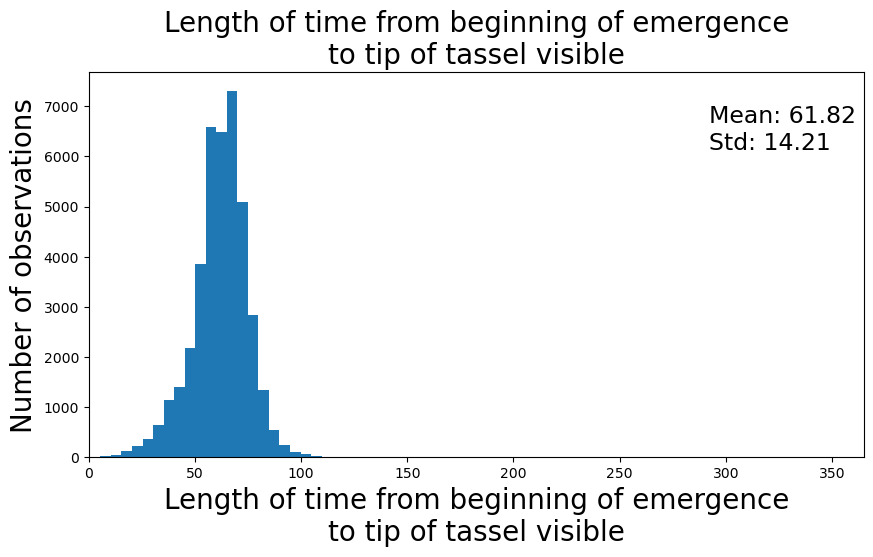

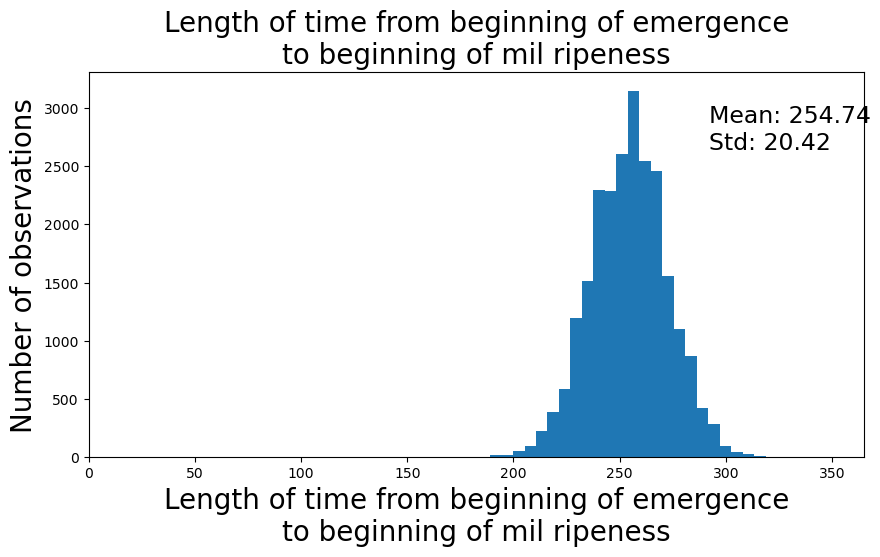

In [5]:
plotting.plot_stage_to_stage(phen_data_maize, 'beginning of emergence', 'tip of tassel visible')
plotting.plot_stage_to_stage(phen_data_wheat, 'beginning of emergence', 'beginning of mil ripeness', winter_sowing = True)

In [ ]:
print(phen_data_wheat['Name of phase'])
#phen_data = dataset_fctns.time_to_next_stage(phen_data)
#print(phen_data.isnull().sum())
## COUNT NUMBER AND AVERAGE LENGTH GOING FROM ONE PHASE TO ANOTHER ##
#plotting.count_transition_numbers(phen_data)
## PLOT LOCATIONS OF STATIONS ##   
#plotting.plot_station_locations(phen_data, station_data)
## PLOT AVERAGE NUMBER OF OBSERVATIONS PER STATION ##
#print(phen_data.groupby('Stations_id').size())
#plotting.plot_avg_num_obs_grouped(phen_data, 'Stations_id', 'avg_num_obs_per_station', 'Histogram number of obs per year')
#plotting.plot_avg_num_obs_grouped(phen_data, 'Referenzjahr', 'avg_num_obs_per_year', 'Histogram number of obs per station')
#print(phen_data.groupby(['Stations_id', 'Referenzjahr']).size())
#plotting.plot_avg_num_yearly_obs(phen_data)
## PLOT AVERAGE LENGTH OF PHASE BY LOCATION ##
#plotting.length_phase_box_plot(phen_data, ['beginning of tilling sowing drilling', 
#                        'beginning of emergence', 
#                        'beginning of growth in height', 
#                        'tip of tassel visible', 
#                        'beginning of flowering', 
#                        'beginning of mil ripeness', 
#                        'beginning of wax-ripe stage'])
#plotting.day_of_emergence_map(phen_data)
#print(phen_data[['Eintrittsdatum', 'Name of phase', 'Time to next stage']])
#temp_data = 12
#print(station_data['Unnamed: 2'])
#def next_observed_phase()
plotting.plot_stage_to_stage(phen_data_maize, 'beginning of emergence', 'tip of tassel visible')
plotting.plot_stage_to_stage(phen_data_wheat, 'beginning of emergence', 'beginning of mil ripeness', winter_sowing = True)